<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/bayes_iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ベイズ識別（アヤメのデータ（二次元））

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)

Size of the data =  (150, 2)


In [3]:
n = X.shape[0]
mdim = X.shape[1]

print(y)

X1 = X[y == 0,:]
X2 = X[y == 1,:]
X3 = X[y == 2,:]

n1 = len(X1)
n2 = len(X2)
n3 = len(X3)

#print X1
#print X1.shape
#print X2
#print X2.shape
#print X3
#print X3.shape

# estimate the mean vector of each class
mu1 = sum(np.asarray(X1,dtype=np.float)) / float(n1)
mu2 = sum(np.asarray(X2,dtype=np.float)) / float(n2)
mu3 = sum(np.asarray(X3,dtype=np.float)) / float(n3)

#print 'mu1\n', mu1
#print 'mu2\n', mu2
#print 'mu3\n', mu3

# estimate the covariance matrices of each class
X1_m = X1 - mu1
X2_m = X2 - mu2
X3_m = X3 - mu3

#print 'X1_m\n', X1_m
#print 'X2_m\n', X2_m
#print 'X3_m\n', X3_m

S1 = np.dot(X1_m.T, X1_m)/float(n1)
S2 = np.dot(X2_m.T, X2_m)/float(n2)
S3 = np.dot(X3_m.T, X3_m)/float(n3)

print('S1\n', S1)
print('S2\n', S2)
print('S3\n', S3)

S1inv = np.linalg.inv(S1)
S2inv = np.linalg.inv(S2)
S3inv = np.linalg.inv(S3)

print('S1inv\n', S1inv)
print('S2inv\n', S2inv)
print('S3inv\n', S3inv)

S1det = np.linalg.det(S1)
S2det = np.linalg.det(S2)
S3det = np.linalg.det(S3)

print('S1det = ', S1det, 'S2det = ', S2det, 'S3det = ', S3det)

# probabilities of each class P(C_k)
P1 = 1.0 / 3.0
P2 = 1.0 / 3.0
P3 = 1.0 / 3.0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
S1
 [[0.121764 0.097232]
 [0.097232 0.140816]]
S2
 [[0.261104 0.08348 ]
 [0.08348  0.0965  ]]
S3
 [[0.396256 0.091888]
 [0.091888 0.101924]]
S1inv
 [[ 18.30619921 -12.64024231]
 [-12.64024231  15.82942308]]
S2inv
 [[ 5.29416185 -4.57986146]
 [-4.57986146 14.32463041]]
S3inv
 [[ 3.19064961 -2.87648063]
 [-2.87648063 12.40447835]]
S1det =  0.007692257599999981 S2det =  0.01822762560000002 S3det =  0.03194459200000002


In [4]:
# discriminant functions
G = np.zeros((n,3))

for i in range(n):
    dx1 = X[i,:] - mu1
    dx2 = X[i,:] - mu2
    dx3 = X[i,:] - mu3
    G[i,0] = np.log(P1) - np.dot(np.dot(dx1.T, S1inv),dx1)/2.0 - np.log(S1det)
    G[i,1] = np.log(P2) - np.dot(np.dot(dx2.T, S2inv),dx2)/2.0 - np.log(S2det)
    G[i,2] = np.log(P3) - np.dot(np.dot(dx3.T, S3inv),dx3)/2.0 - np.log(S3det)
    
print('G\n', G)

print('Arg_max\n', np.argmax(G, axis=1))

print('Confusion Matrix\n', confusion_matrix(y, np.argmax(G, axis=1)))

x = range(n)


G
 [[ 3.73257118e+00 -5.55562524e+00 -5.15453635e+00]
 [ 2.78969844e+00 -1.40507257e+00 -2.33092477e+00]
 [ 3.38231510e+00 -4.89614713e+00 -4.88561071e+00]
 [ 3.09194781e+00 -4.61770494e+00 -4.77880390e+00]
 [ 3.52140561e+00 -7.90501407e+00 -6.96784422e+00]
 [ 2.93544759e+00 -9.77378188e+00 -8.38906506e+00]
 [ 2.39765749e+00 -8.51606019e+00 -7.52142775e+00]
 [ 3.76451759e+00 -4.95626796e+00 -4.74932285e+00]
 [ 2.24555910e+00 -4.37459264e+00 -4.86045528e+00]
 [ 3.25406407e+00 -2.28063587e+00 -2.91074873e+00]
 [ 3.11710557e+00 -6.33194687e+00 -5.65639344e+00]
 [ 3.44721152e+00 -6.63028084e+00 -6.07156231e+00]
 [ 3.04512410e+00 -2.08535536e+00 -2.89293852e+00]
 [ 1.57632254e+00 -6.28089359e+00 -6.18160472e+00]
 [ 1.14971176e+00 -8.74474165e+00 -7.50001567e+00]
 [ 4.09476541e-01 -1.80325635e+01 -1.51674011e+01]
 [ 2.93544759e+00 -9.77378188e+00 -8.38906506e+00]
 [ 3.73257118e+00 -5.55562524e+00 -5.15453635e+00]
 [ 1.52850303e+00 -5.95300009e+00 -5.25434667e+00]
 [ 3.03478644e+00 -1.0485956

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


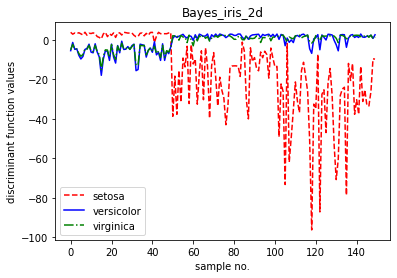

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


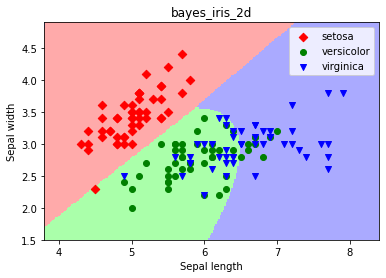

In [5]:

plt.plot(x, G[:,0], color='red', ls='--', label=target_names[0])
plt.plot(x, G[:,1], color='blue', ls='-', label=target_names[1])
plt.plot(x, G[:,2], color='green', ls='-.', label=target_names[2])
plt.legend()
plt.title('Bayes_iris_2d')
plt.xlabel("sample no.")
plt.ylabel("discriminant function values")         
plt.savefig("bayes_iris_2d_disc.eps")
plt.show()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z=[]
G=np.zeros((3))
for Xvec in np.c_[xx.ravel(), yy.ravel()]:
#    print(X)
    dx1 = Xvec - mu1
    dx2 = Xvec - mu2
    dx3 = Xvec - mu3
    G[0] = np.log(P1) - np.dot(np.dot(dx1.T, S1inv),dx1)/2.0 - np.log(S1det)
    G[1] = np.log(P2) - np.dot(np.dot(dx2.T, S2inv),dx2)/2.0 - np.log(S2det)
    G[2] = np.log(P3) - np.dot(np.dot(dx3.T, S3inv),dx3)/2.0 - np.log(S3det)
    Z.append(np.argmax(G))
Z=np.asarray(Z)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('bayes_iris_2d')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('bayes_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()
